## AgeBinned Phase 3 (Data Preparation): Binning Idee

* Autorin: Anna (i3-Versicherung)
* Webseite: [Data Science Training - Kapitel 15](https://data-science.training/kapitel-15/)
* Datum: 23.03.2023

Age: kardinalskaliert => Regression

AgeBinned (Umwandlung mittels Binning): ordinalskaliert => Mehrklassen-Klassifikation

Die Diagramme werden mit Matplotlib bzw. Seaborn erstellt und gespeichert.

In [5]:
# Pandas Paket (Package) importieren
#  Datenstrukturen und Datenanalyse, I/O
#  https://pandas.pydata.org/pandas-docs/stable/
import pandas as pd
# Pyplot Modul der Matplot Bibliothek (Library) importieren
#  Mathematische grafische Daten-Visualisierungen
#  https://matplotlib.org/contents.html
import matplotlib.pyplot as plt
# Seaborn importieren [sns = seaborn name space, Samuel Norman Seaborn]
#  High-end Daten-Visualisierungen auf Basis von Matplot
#  https://seaborn.pydata.org/
import seaborn as sns
# Deutsches Zahlenformat
import locale
locale.setlocale(locale.LC_ALL, 'de')
# Warnungen unterdrücken
#import warnings
#warnings.filterwarnings('ignore')

'de'

In [6]:
# Trainings- und Testdaten als Pandas Data Frame (df) aus CSV-Dateien laden
#  (KNIME: "CSV Reader")
#df_train = pd.read_csv('../../data/titanic/original/train.csv')
#df_test  = pd.read_csv('../../data/titanic/original/test.csv')

In [7]:
# Trainings- und Testdaten zusammenführen
#  (KNIME "Concatenate")
#df = pd.concat([df_train, df_test], ignore_index=True)

In [8]:
# Nur Trainingsdaten
df = pd.read_csv('../../data/titanic/original/train.csv')

In [9]:
# Datentypen automatisch konvertieren
df = df.convert_dtypes()

In [10]:
# Fehlende Werte prüfen
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Fehlende Werte löschen
df['Age'] = df['Age'].dropna()

In [12]:
# Fehlende Werte prüfen
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# Spezielle Titanic-Statistik (Überlebenswahrscheinlichkeiten)
def dst_titanic_statistics(df, col):
    stats = df.groupby([col], as_index=False, observed=True)['PassengerId'].count() # Spalte "PassengerId" aus Titanic-Daten
    probs = df.groupby([col], as_index=False, observed=True)['Survived'].mean()     # Spalte "Survived"    aus Titanic-Daten
    stats = stats.merge(probs, on=col)
    stats = stats.rename(columns={'PassengerId': 'Anzahl', 'Survived': 'Überlebenswahrscheinlichkeit'})
    return stats

In [14]:
# Seaborn: Allgemeine Einstellungen

# Schriftart setzen
sns.set(font = 'Arial')
# Schriftgröße setzen
sns.set(font_scale = 2.5)
# Achsen im deutschen Zahlenformat
plt.rcParams['axes.formatter.use_locale'] = True
# Bildgröße setzen (16 x 9)
sns.set(rc={'figure.figsize':(8, 4.5)})
# Weißes Gitter setzen
sns.set_style('whitegrid')

In [15]:
# Age Binning - Teil 1: Automatisches Binning (mittels Quantile)
df['AgeBinned'] = pd.qcut(df['Age'], 6)
# Statistik (Überlebenswahrscheinlichkeiten)
stats = dst_titanic_statistics(df, 'AgeBinned')
display(stats)

,AgeBinned,Anzahl,Überlebenswahrscheinlichkeit
0,"(0.419, 18.0]",139,0.503597
1,"(18.0, 23.0]",107,0.308411
2,"(23.0, 28.0]",116,0.387931
3,"(28.0, 34.0]",116,0.413793
4,"(34.0, 44.0]",121,0.421488
5,"(44.0, 80.0]",115,0.373913


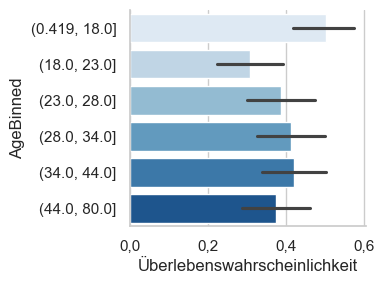

In [16]:
# Barplot zu AgeBinned: Überlebenswahrscheinlichkeit
sns.catplot(data=df, x='Survived', y='AgeBinned', kind='bar', palette='Blues', height=3, aspect=1.333, orient='h', hue='AgeBinned', legend=False)

# Achsen beschriften
plt.xlabel('Überlebenswahrscheinlichkeit')
plt.ylabel('AgeBinned')

# Grafik speichern
plt.savefig('../../figures/svg/Bar_AgeBinned_1st_Try_1.svg', format='svg', dpi=1200, transparent=True)

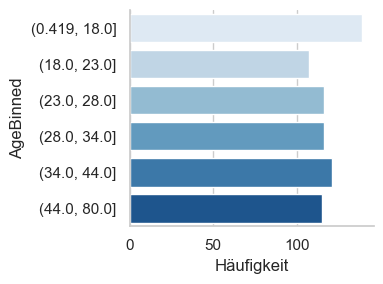

In [17]:
# Barplot zu AgeBinned: Absolute Häufigkeiten
sns.catplot(data=df, y='AgeBinned', kind='count', palette='Blues', height=3, aspect=1.333, hue='AgeBinned', legend=False)

# Achsen beschriften
plt.xlabel('Häufigkeit')
plt.ylabel('AgeBinned')

# Grafik speichern
plt.savefig('../../figures/svg/Bar_AgeBinned_1st_Try_2.svg', format='svg', dpi=1200, transparent=True)

In [18]:
# Age Binning - Teil 2: Manuelles Binning
bins = [0, 12, 24, 45, 60, 120]
labels = ['Child', 'YoungAdult', 'Adult', 'OlderAdult', 'Senior']
df['AgeBinned'] = pd.cut(df['Age'], bins, right=False, labels=labels)
# Statistik (Überlebenswahrscheinlichkeiten)
stats = dst_titanic_statistics(df, 'AgeBinned')
display(stats)

,AgeBinned,Anzahl,Überlebenswahrscheinlichkeit
0,Child,68,0.573529
1,YoungAdult,179,0.357542
2,Adult,352,0.409091
3,OlderAdult,89,0.404494
4,Senior,26,0.269231


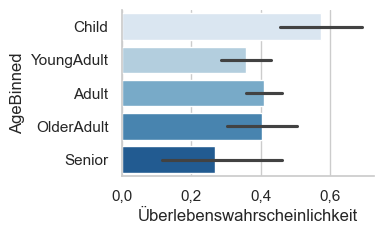

In [19]:
# Barplot zu AgeBinned: Überlebenswahrscheinlichkeit
sns.catplot(data=df, x='Survived', y='AgeBinned', kind='bar', palette='Blues', height=2.5, aspect=1.6, orient='h', hue='AgeBinned', legend=False)

# Achsen beschriften
plt.xlabel('Überlebenswahrscheinlichkeit')
plt.ylabel('AgeBinned')

# Grafik speichern
plt.savefig('../../figures/svg/Bar_AgeBinned_2nd_Try_1.svg', format='svg', dpi=1200, transparent=True)

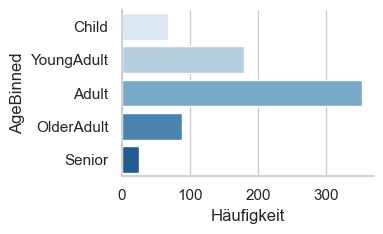

In [20]:
# Barplot zu AgeBinned: Absolute Häufigkeiten
sns.catplot(data=df, y='AgeBinned', kind='count', palette='Blues', height=2.5, aspect=1.6, hue='AgeBinned', legend=False)

# Achsen beschriften
plt.xlabel('Häufigkeit')
plt.ylabel('AgeBinned')

# Grafik speichern
plt.savefig('../../figures/svg/Bar_AgeBinned_2nd_Try_2.svg', format='svg', dpi=1200, transparent=True)

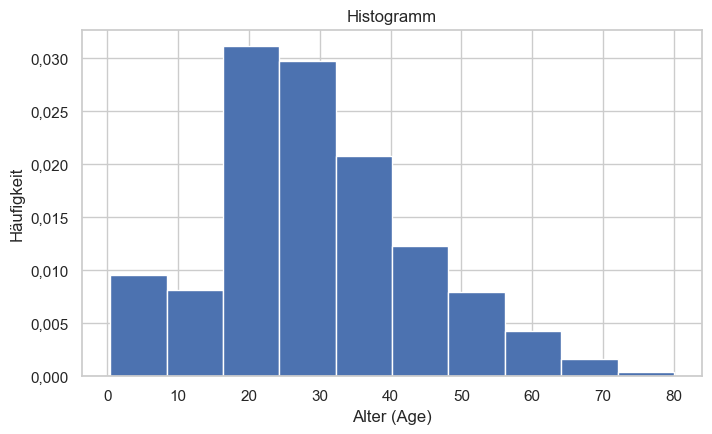

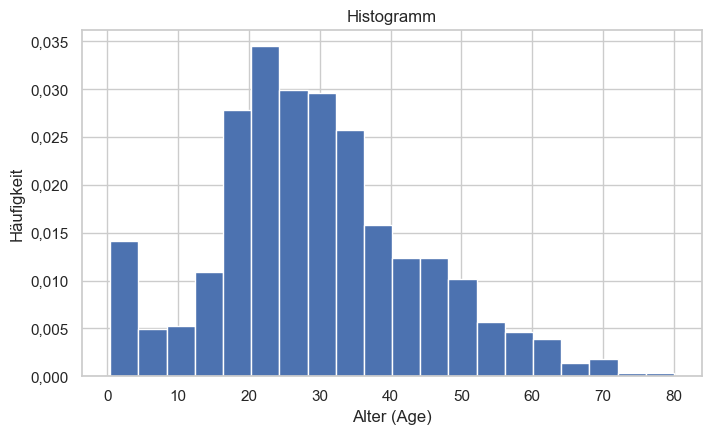

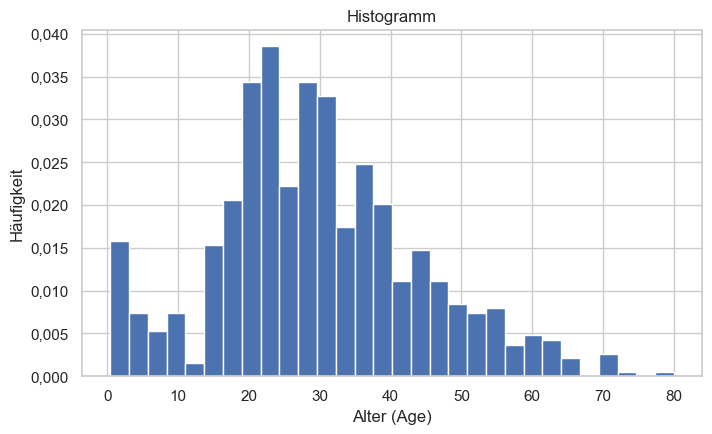

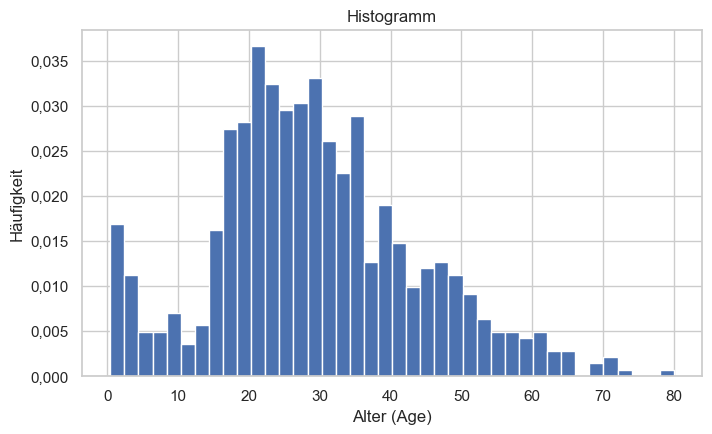

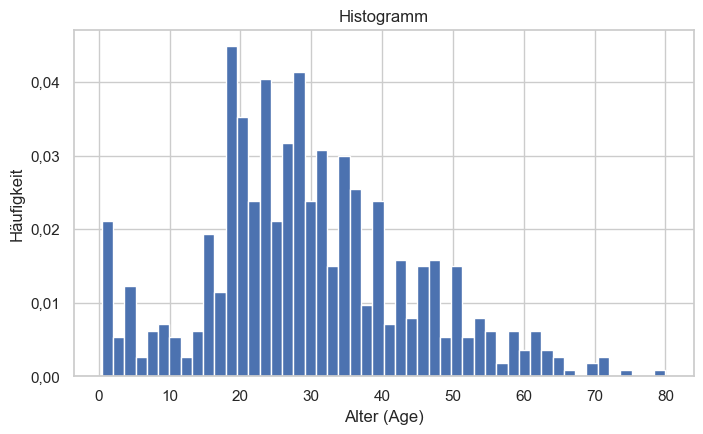

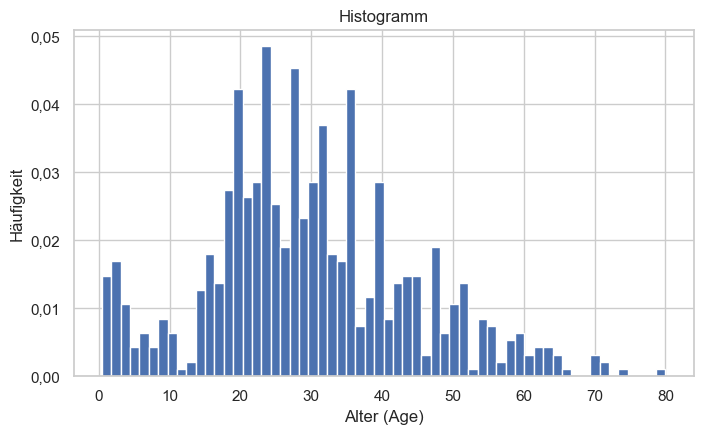

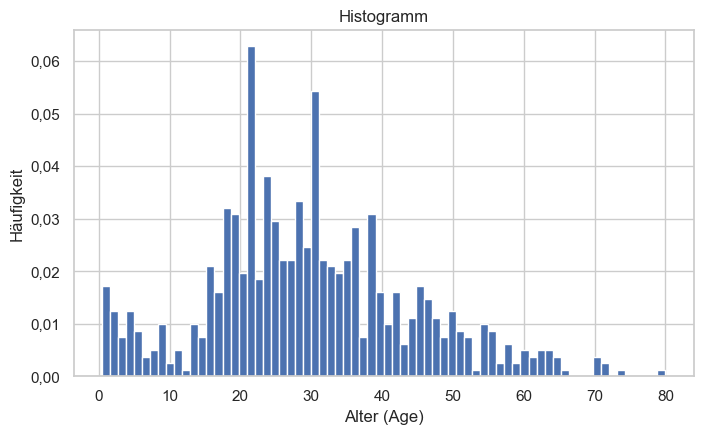

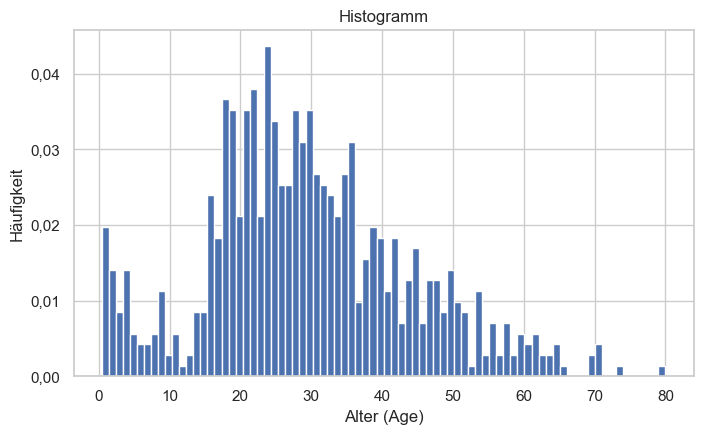

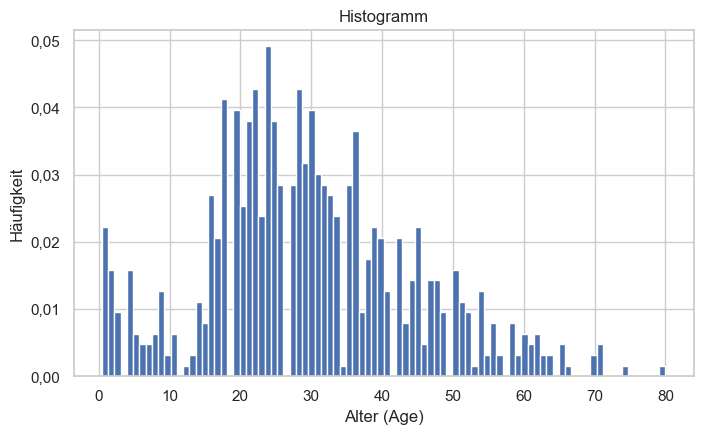

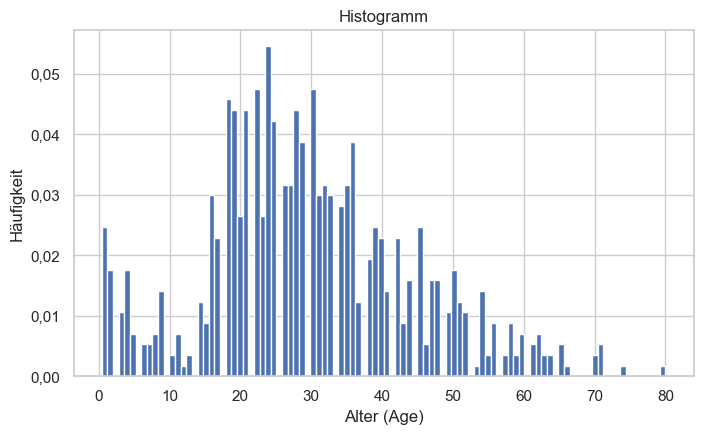

In [21]:
# Histogramm des Attributs Age
age = df['Age'].dropna()
for n in range(10, 110, 10):
    plt.hist(age, bins=n, density=True)
    plt.title('Histogramm')
    plt.xlabel('Alter (Age)')
    plt.ylabel('Häufigkeit')
    plt.show()

In [22]:
# Age Binning - Teil 3: Manuelles Binning
bins = [0, 10, 20, 30, 40, 60, 120]
labels = ['Child', 'Teenage', 'Young', 'Adult', 'Middle', 'Senior']
df['AgeBinned'] = pd.cut(df['Age'], bins, right=False, labels=labels)
# Statistik (Überlebenswahrscheinlichkeiten)
stats = dst_titanic_statistics(df, 'AgeBinned')
display(stats)

,AgeBinned,Anzahl,Überlebenswahrscheinlichkeit
0,Child,62,0.612903
1,Teenage,102,0.401961
2,Young,220,0.35
3,Adult,167,0.437126
4,Middle,137,0.394161
5,Senior,26,0.269231


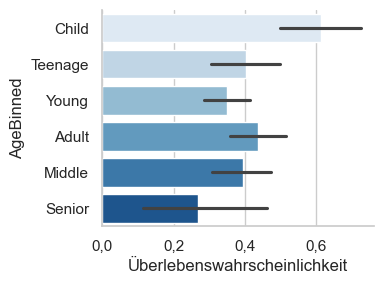

In [23]:
# Barplot zu AgeBinned: Überlebenswahrscheinlichkeit
sns.catplot(data=df, x='Survived', y='AgeBinned', kind='bar', palette='Blues', height=3, aspect=1.333, orient='h', hue='AgeBinned', legend=False)

# Achsen beschriften
plt.xlabel('Überlebenswahrscheinlichkeit')
plt.ylabel('AgeBinned')

# Grafik speichern
plt.savefig('../../figures/svg/Bar_AgeBinned_3rd_Try_1.svg', format='svg', dpi=1200, transparent=True)

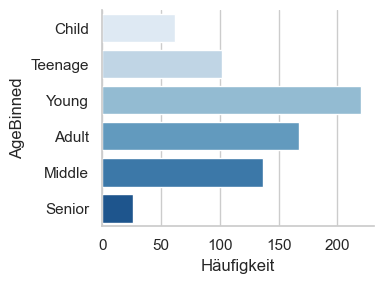

In [24]:
# Barplot zu AgeBinned: Absolute Häufigkeiten
sns.catplot(data=df, y='AgeBinned', kind='count', palette='Blues', height=3, aspect=1.333, hue='AgeBinned', legend=False)

# Achsen beschriften
plt.xlabel('Häufigkeit')
plt.ylabel('AgeBinned')

# Grafik speichern
plt.savefig('../../figures/svg/Bar_AgeBinned_3rd_Try_2.svg', format='svg', dpi=1200, transparent=True)

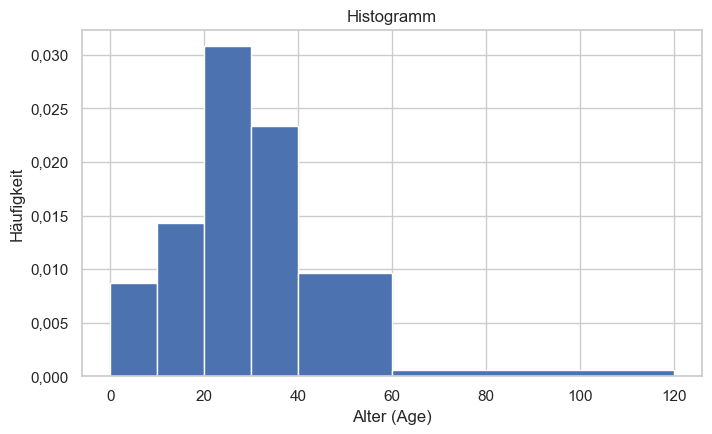

In [25]:
# Histogramm des Attributs Age
age = df['Age'].dropna()
plt.hist(age, bins=bins, density=True)
plt.title('Histogramm')
plt.xlabel('Alter (Age)')
plt.ylabel('Häufigkeit')
plt.show()